In [1]:
# V 6.1 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, BatchNormalization
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

Using TensorFlow backend.
C:\Users\YooSeok\Anaconda3\envs\Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\YooSeok\Anaconda3\envs\Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\YooSeok\Anaconda3\envs\Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\YooSeok\Anaconda3\envs\Keras\lib

In [3]:
#GPU 옵션
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [4]:
df_data = pd.read_csv('data v2.csv')
print(df_data.shape)
df_data.head(3)

(53900, 20)


,Time,code,month,day,hour,min,1temp,1hum,1lux,2temp,2hum,2lux,3lux,a1temp,a1hum,a1lux,a2temp,a2hum,a2lux,a3lux
0,2018-08-10 09:45:10 UTC,8-10-9-45,8,10,9,45,26.51,57.29,68.272,26.145005,64.510005,13.294,68.221,26.51,57.29000,68.272,26.145005,64.510005,13.294,68.221
1,2018-08-10 09:45:49 UTC,8-10-9-45,8,10,9,45,26.51,57.29,68.272,26.145005,64.510005,13.294,68.221,26.50,57.45000,73.933,25.909990,65.390000,54.519,102.748
2,2018-08-10 09:46:37 UTC,8-10-9-46,8,10,9,46,26.50,57.45,73.933,25.909990,65.390000,54.519,102.748,26.50,57.55999,74.783,25.730010,65.730010,73.066,101.830


In [5]:
month, day, hour, minu, lux1, label = [], [], [], [], [], []

month.append(df_data['month'])
day.append(df_data['day'])
hour.append(df_data['hour'])
minu.append(df_data['min'])

lux1.append(df_data['1temp'])
label.append(df_data['a1temp'])

In [6]:
month = np.array(month).reshape(-1, 1)
day = np.array(day).reshape(-1, 1)
hour = np.array(hour).reshape(-1, 1)
minu = np.array(minu).reshape(-1, 1)

lux1 = np.array(lux1).reshape(-1, 1)
label = np.array(label).reshape(-1, 1)

In [7]:
print(label.shape)

(53900, 1)


In [8]:
#data=np.concatenate((year, month, day, hour, a0132, b3404, c3405), axis=1).reshape(-1, 1, 7)
data=np.concatenate((month, day, hour, minu, lux1), axis=1).reshape(-1, 1, 5)

In [9]:
arrnum = 20
train_data=data[:48000]
train_label=label[arrnum:48000]
test_data=data[48001:]
test_label=label[48001+arrnum:]

In [10]:

arr = []
for i in range(arrnum):
    arr.append(train_data[i:(i-arrnum),:])

arr = np.array(arr, dtype=np.float32)
print(arr.shape)

(20, 47980, 1, 5)


In [11]:
train_val_data = np.concatenate((arr[0], arr[1], arr[2], arr[3], arr[4], arr[5], arr[6], arr[7], arr[8], arr[9], arr[10], arr[11], arr[12], arr[13], arr[14], arr[15], arr[16], arr[17], arr[18], arr[19]), axis=1).reshape(-1, arrnum, 5)
train_mean, train_std = np.mean(train_val_data, axis=0), np.std(train_val_data, axis=0)
train_mean, train_std = np.mean(train_mean, axis=0), np.mean(train_std, axis=0)
print(train_val_data.shape)
print(train_label.shape)

(47980, 20, 5)
(47980, 1)


In [12]:
x_train, x_val, y_train, y_val = train_test_split(train_val_data, train_label, test_size=0.2)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(38384, 20, 5) (38384, 1) (9596, 20, 5) (9596, 1)


In [13]:
arr = []
for i in range(arrnum):
    arr.append(test_data[i:(i-arrnum),:])
    
arr = np.array(arr, dtype=np.float32)
print(arr.shape)


(20, 5879, 1, 5)


In [14]:
x_test = np.concatenate((arr[0], arr[1], arr[2], arr[3], arr[4], arr[5], arr[6], arr[7], arr[8], arr[9], arr[10], arr[11], arr[12], arr[13], arr[14], arr[15], arr[16], arr[17], arr[18], arr[19]), axis=1).reshape(-1, arrnum, 5)
y_test = test_label.reshape(-1, 1)
print(x_test.shape, y_test.shape)

(5879, 20, 5) (5879, 1)


In [15]:
y_test

array([[ 0.  ],
       [ 0.  ],
       [ 0.  ],
       ...,
       [27.58],
       [27.6 ],
       [27.58]])

In [16]:
h_units = 512
activation_ = 'relu'

def rnn_model():
    model = Sequential()
    model.add(LSTM(units=h_units, return_sequences=True, input_shape=(arrnum,5)))        
    model.add(LSTM(units=h_units, return_sequences=False))
    model.add(Dense(h_units))
    model.add(Dense(1))
    
    return model

In [17]:
model = rnn_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 512)           1060864   
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 3,423,233
Trainable params: 3,423,233
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
batch = 512
tensorBoard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)

hist = model.fit(x_train, y_train, epochs=100, batch_size=batch, verbose=True, validation_data=(x_val, y_val), shuffle=True, callbacks=[tensorBoard])

Instructions for updating:
Use tf.cast instead.
Train on 38384 samples, validate on 9596 samples
Epoch 1/100
38384/38384 [==============================] - 9s 237us/step - loss: 28.3384 - val_loss: 4.8037
Epoch 2/100
38384/38384 [==============================] - 8s 197us/step - loss: 4.7952 - val_loss: 3.9012
Epoch 3/100
38384/38384 [==============================] - 8s 196us/step - loss: 4.4345 - val_loss: 3.8307
Epoch 4/100
38384/38384 [==============================] - 8s 197us/step - loss: 4.4003 - val_loss: 3.8693
Epoch 5/100
38384/38384 [==============================] - 8s 196us/step - loss: 4.3306 - val_loss: 3.8252
Epoch 6/100
38384/38384 [==============================] - 7s 195us/step - loss: 4.2992 - val_loss: 3.7737
Epoch 7/100
38384/38384 [==============================] - 7s 195us/step - loss: 4.3424 - val_loss: 4.0112
Epoch 8/100
38384/38384 [==============================] - 8s 198us/step - loss: 4.2677 - val_loss: 4.0568
Epoch 9/100
38384/38384 [=====================

In [20]:
y_pred = model.predict(x_test, batch_size=batch, verbose=True) 

5879/5879 [==============================] - 1s 103us/step


In [21]:
print(y_pred.shape)
print(model.evaluate(x_test, y_test ,batch_size=batch))

(5879, 1)
5879/5879 [==============================] - 0s 74us/step
5.804551800288074


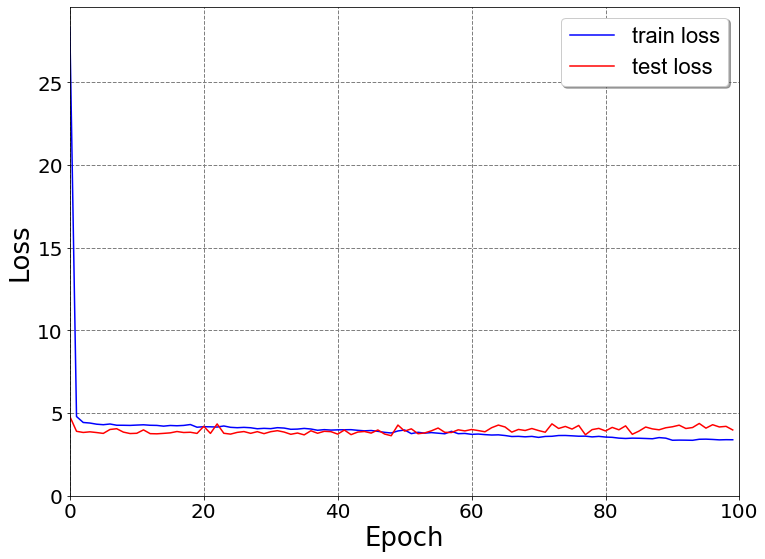

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(12,9))

# set font
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)


loss_ax.plot(hist.history['loss'], 'b', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

loss_ax.set_xlabel('Epoch', fontsize = 26)
loss_ax.set_ylabel('Loss', fontsize = 26)

# set axis-limits
plt.xlim(left = 0, right = 100) 
plt.ylim(bottom = 0) 

plt.xticks(np.arange(0,101,20), fontsize = 20)
plt.yticks(fontsize = 20)

# thousand comma
loss_ax.set_yticklabels(['{:,}'.format(int(x)) for x in loss_ax.get_yticks().tolist()])

# set grid
plt.grid(color='gray', linestyle='--', linewidth=1)

# set legend position
plt.legend(shadow=True, loc='upper right', fontsize = 22)
#loss_ax.legend(loc='upper right')

plt.savefig('3 loss_graph.png', dpi=300)

plt.show()

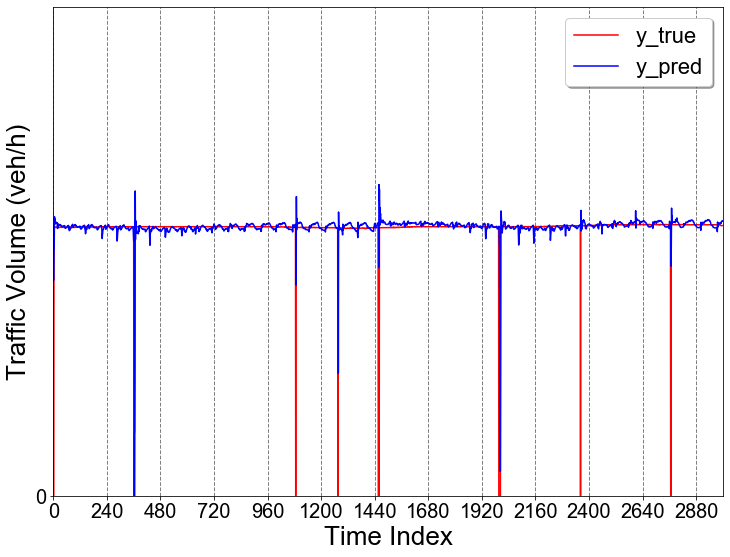

In [27]:
fig, pred_ax = plt.subplots(figsize=(12,9))

# set font
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

# plot data 
pred_ax.plot(y_test[:,0], 'r', label='y_true')
pred_ax.plot(y_pred[:,0], 'b', label='y_pred')

# set legend position
plt.legend(shadow=True, loc='upper right', fontsize = 22)

#plt.title('prediction result')
plt.xlabel('Time Index', fontsize = 26)
plt.ylabel('Traffic Volume (veh/h)', fontsize = 26)

# set axis-limits
plt.xlim(left = 10, right = 3000) 
plt.ylim(bottom = 0, top=50) 

# set grid
plt.grid(color='gray', linestyle='--', linewidth=1)

plt.xticks(np.arange(0,3001,240), fontsize = 20)
plt.yticks(np.arange(0,51,500), fontsize = 20)

# thousand comma
pred_ax.set_yticklabels(['{:,}'.format(int(x)) for x in pred_ax.get_yticks().tolist()])
plt.savefig('pred_graph.png', dpi=300)
plt.show()

In [26]:
y_test

array([[ 0.  ],
       [ 0.  ],
       [ 0.  ],
       ...,
       [27.58],
       [27.6 ],
       [27.58]])

In [24]:
#MAPE

y_test, y_pred = np.array(test_label), np.array(y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE: ', mape)

MAPE:  inf


C:\Users\YooSeok\Anaconda3\envs\Keras\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
